In [1]:
import requests

WEBPAGE_URL = 'https://ml-gis-service.com/index.php/teaching/'

In [2]:
# Always monitor connections!
# https://requests.readthedocs.io/en/latest/user/quickstart/#errors-and-exceptions

try:
    page = requests.get(WEBPAGE_URL)
except requests.exceptions.Timeout:
    print('Info: page is not available now...')
except requests.exceptions.TooManyRedirects:
    print('Info: probably url has changed...')
except requests.exceptions.RequestException as e:
    raise SystemExit(e('Critical Error!'))

In [3]:
page.status_code

200

In [4]:
def check_page_tag(page_content, tag_type, unique_text):
    """
    Function performs check if we're connected to the right page
    based on the header value. Method raises IOError if header is
    not detected.
    
    :param page_content: (bytes) output of requests package,
    :param tag_type: (str) HTML tag type to check
    :param unique_text: (str) unique text inside tag_type element from the page

    """
    page_content = str(page_content)
    error_message = f'You\'ve not connected to the service.\n\
    HTML tag {tag_type} of value "{unique_text}" wasn\'t detected.'
    
    headers = soup.find_all(tag_type)
    
    # Now we can terminate if there are no headers
    if not headers:
        raise IOError(error_message)
    else:
        # Check if unique header exist
        headers_text = [h.get_text() for h in headers]
    
        if not unique_text in headers_text:
            raise IOError(error_message)

In [5]:
from bs4 import BeautifulSoup

WEBPAGE_HEADER = 'Data Science workshops materials'

soup = BeautifulSoup(page.content, 'html.parser')
check_page_tag(page.content, 'h2', WEBPAGE_HEADER)

In [6]:
words_candidates = soup.find_all('li')
print(words_candidates)

[<li class="menu-item menu-item-type-post_type menu-item-object-page narrow" id="nav-menu-item-87"><a class="" href="https://ml-gis-service.com/index.php/about/"><span class="item_outer"><span class="item_inner"><span class="item_text">Author</span></span></span></a></li>, <li class="menu-item menu-item-type-post_type menu-item-object-page current-menu-item page_item page-item-121 current_page_item mkd-active-item narrow" id="nav-menu-item-124"><a class="current" href="https://ml-gis-service.com/index.php/teaching/"><span class="item_outer"><span class="item_inner"><span class="item_text">Teaching</span></span></span></a></li>, <li class="cat-item cat-item-2"><a href="https://ml-gis-service.com/index.php/category/data-engineering/">Data Engineering</a>
</li>, <li class="cat-item cat-item-18"><a href="https://ml-gis-service.com/index.php/category/data-science/">Data Science</a>
</li>, <li class="cat-item cat-item-19"><a href="https://ml-gis-service.com/index.php/category/machine-learnin

In [7]:
words_candidates = soup.find_all('li', class_=None)
words = [x.get_text() for x in words_candidates]

## Levenstein distance - sample word

In [8]:
from fuzzywuzzy import fuzz

SAMPLE = 'shark'  # you should create other word

In [9]:
def find_distance(word, list_of_words):
    """
    Function calculates Levenshtein Distance between given word
    and other words.
    
    :param word: (str) single word to test distance from it to other
        words,
    :param list_of_words: (list) list of other words to compare
    
    
    :return: (list) list of distances from a given word to other words,
        position of each distance is the same as other words indexes.
    """
    
    distances = []
    for single_word in list_of_words:
        distance = fuzz.ratio(word, single_word)
        distances.append(distance)
    return distances

In [10]:
distances = find_distance(SAMPLE, words)

In [11]:
distances[:3]

[0, 44, 0]

### Results to DataFrame

In [12]:
import pandas as pd

df = pd.DataFrame(data=distances, index=words, columns=[SAMPLE])

In [13]:
df[df[SAMPLE] >= 50]

,shark
car,50
art,50
war,50
air,50


### Barplot

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_bars(bardata, column_to_plot, lower_thresh=20):
    
    ndf = (bardata[bardata[column_to_plot] > lower_thresh]).sort_values(
        column_to_plot, ascending=False)
    
    plt.figure(figsize=(14, 6))
    sns.barplot(x=ndf.index,
                y=ndf[column_to_plot],
                hue=ndf[column_to_plot],
                palette="rocket",
                dodge=False)
    plt.xticks(rotation=90)
    plt.title(f'Distance from the word {SAMPLE} to other words')
    plt.show()

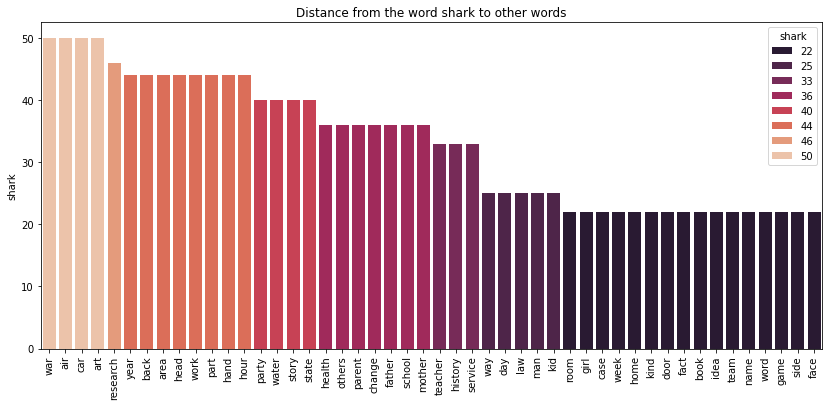

In [16]:
plot_bars(df, SAMPLE)

## Multiple words - similarity matrix (map)

In [17]:
words.append(SAMPLE)  # append sample word

In [18]:
df = pd.DataFrame(index=words, columns=words)  # Create new DataFrame

In [19]:
df.head()

,time,year,people,way,day,man,thing,woman,life,child,...,reason,research,girl,guy,moment,air,teacher,force,education,shark
time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
for w_ in words:
    for _w in words:
        if w_ == _w:
            pass
        else:
            # Check if value has been set already 
            if pd.isna(df.at[w_, _w]) and pd.isna(df.at[_w, w_]):
                distance = fuzz.ratio(w_, _w)
                df.at[w_, _w] = distance
                df.at[_w, w_] = distance

In [21]:
df.head()

,time,year,people,way,day,man,thing,woman,life,child,...,reason,research,girl,guy,moment,air,teacher,force,education,shark
time,NaN,25,20,0,0,29,44,22,50,22,...,20,17,25,0,40,29,36,22,31,0
year,25,NaN,20,29,29,29,0,22,25,0,...,40,50,25,29,20,57,55,22,31,44
people,20,20,NaN,0,0,0,0,18,40,18,...,33,29,20,0,33,0,31,36,27,0
way,0,29,0,NaN,67,33,0,50,0,0,...,22,18,0,33,0,33,20,0,17,25
day,0,29,0,67,NaN,33,0,25,0,25,...,22,18,0,33,0,33,20,0,33,25


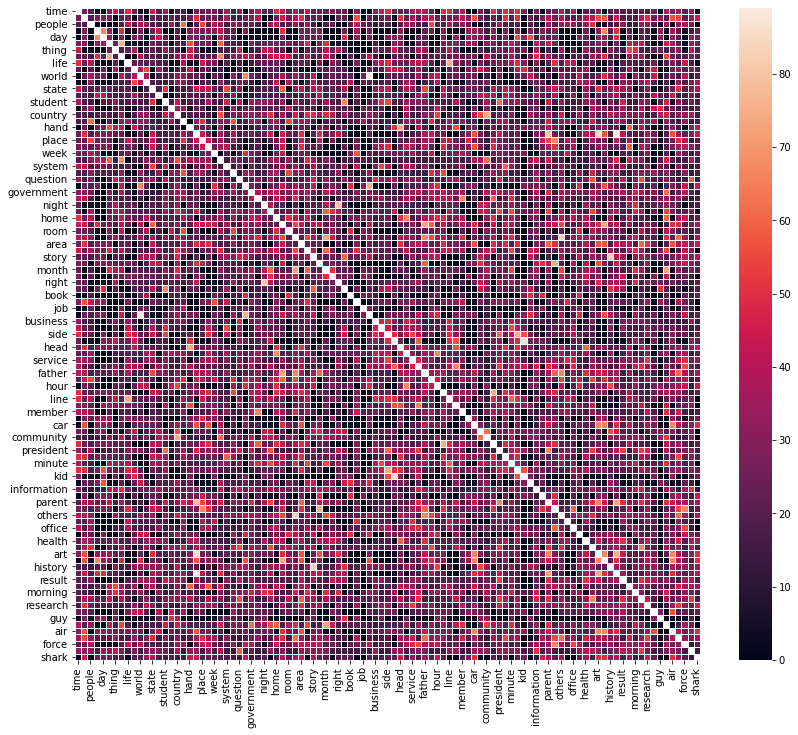

In [22]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.astype(float), linewidths=1)
plt.show()

---